<a href="https://colab.research.google.com/github/MiguelAngel-ht/escuela-de-computacion-cuantica-2023/blob/main/challenges/PIQUE%20challenge/Solution_Jingle_Bell_States/Quantum_Random_Number_Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RANDOM NUMBERS GENERATION with Quantum Computing**
---
---
## **CONTEXT**

*Random number generation* plays a crucial role in areas such as

- Cryptography
- System Simulation
- Take decisions
- Games.

Traditionally, random numbers have been generated in two ways:

- Physical sources of randomness (such as flipping a coin or dice)
- Mathematical algorithms known as pseudorandom number generators (PRNG).

**Quantum Computing**, instead of relying on deterministic algorithms, **use** the inherent properties of quantum mechanics, like **superposition and uncertainty, to produce randomness**.

### **Classical 🆚 Quantum Computing**

While PRNGs (from classical computing) may eventually repeat patterns or be susceptible to prediction if the seed value is known, quantum randomness does not suffer from such weaknesses, making it ideal for high-security applications and other areas where Genuine randomness is of utmost importance.





In [1]:
#@title Importing libraries

from google.colab import output     # clear output when is not necessary
!pip install qiskit
!pip install pylatexenc
!pip install qiskit-aer
output.clear()

import numpy as np

# **USED GATES INTRODUCTION**

We are going to give a brief presentation of the gates that will be used for the circuit, their operation and how to implement them in Qiskit.

###  **Pauli-X Gate**

The Pauli-X gate is the quantum equivalent of the classical NOT gate. It flips the state of a qubit, turning
∣0⟩ into ∣1⟩ and vice versa.



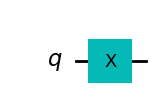

In [2]:
#@title Code
from qiskit import QuantumCircuit

qc = QuantumCircuit(1)
qc.x(0)  # Apply the X gate to qubit 0

qc.draw(output='mpl', style="clifford")

**Use:** To flip the state of a qubit.

###  **CNOT Gate (Controlled-NOT)**

The CNOT gate is a two-qubit quantum gate that performs a NOT operation on the second qubit (target) only when the first qubit (control) is in the state ∣1⟩.



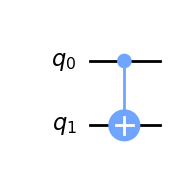

In [3]:
#@title Code
qc = QuantumCircuit(2)
qc.cx(0, 1)  # Apply the CNOT gate with qubit 0 as control and qubit 1 as target

qc.draw(output='mpl', style="clifford")

**Use:** To entangle pairs of qubits and is fundamental in quantum algorithms like quantum teleportation and quantum error correction.

###  **Hadamard Gate**

The Hadamard gate transforms the state
∣0⟩ into $\frac{(∣0⟩+∣1⟩)}{\sqrt{2}}$ and the state ∣1⟩ into $\frac{(∣0⟩−∣1⟩)}{\sqrt{2}}$, creating a superposition of states.



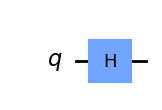

In [4]:
#@title Code
qc = QuantumCircuit(1)
qc.h(0)  # Apply the Hadamard gate to qubit 0

qc.draw(output='mpl', style="clifford")

**Use:** It is used to create superposition states and is essential in algorithms like Grover's algorithm and Shor's algorithm.

###  **Phase S Gate**

The S gate (or $π/2$ phase gate) applies a phase of  $π/2$ to the ∣1⟩ state while leaving the ∣0⟩ state unchanged.


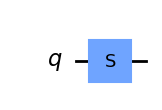

In [5]:
#@title Code
qc = QuantumCircuit(1)
qc.s(0)  # Apply the S gate to qubit 0

qc.draw(output='mpl', style="clifford")

**Use:** To introduce phase differences between quantum states and is important in constructing certain quantum functions and algorithms.

###  **T Gate**

The T gate (or $π/4$ phase gate) applies a phase of $π/4$ to the ∣1⟩ state, while leaving the ∣0⟩ state unchanged.


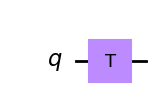

In [6]:
#@title Code
qc = QuantumCircuit(1)
qc.t(0)  # Apply the T gate to qubit 0

qc.draw(output='mpl', style="clifford")

**Use:** The T gate is a more subtle phase gate than the S gate and is used for achieving finer control over phase manipulations in quantum algorithms.

###  **T' Gate (T-dagger or T-inverse)**

The T' gate is the inverse of the T gate and undoes the $π/4$ phase applied by the T gate.


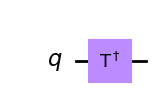

In [7]:
#@title Code
qc = QuantumCircuit(1)
qc.tdg(0)  # Apply the T' (T-dagger) gate to qubit 0

qc.draw(output='mpl', style="clifford")

**Use:** It is used to reverse the action of a T gate and is useful in algorithms that require the inversion of phase operations.

# **THE SIMPLEST CIRCUIT TO GENERATE RANDOM NUMBERS**

The simplest circuit to generate random numbers in quantum computing consists of just adding Hadamard gates to each qubit and due to the superposition property, when measuring each qubit they will collapse and can randomly give a state either 1 or 0.



In [8]:
from qiskit import QuantumCircuit, Aer, execute
import matplotlib.pyplot as plt

# Number of qubits and Hadamard gates
num_qubits = 4

# Create a quantum circuit
qc = QuantumCircuit(num_qubits, num_qubits)

# Apply Hadamard gates to all qubits
for qubit in range(num_qubits):
    qc.h(qubit)

# Measure all qubits
qc.measure(range(num_qubits), range(num_qubits))

Since we added 4 qubits, the numbers that can come out as a result of the simulation are from 0 to 15. The domain is $[0, 2^n - 1]$

In [9]:
# Choose the backend for simulation (qasm_simulator)
backend = Aer.get_backend('qasm_simulator')

# Execute the circuit and get measurement results
job = execute(qc, backend, shots=1)
result = job.result()
counts = result.get_counts()

# Show the number generated
print(int([clave if valor == 1 else 0 for clave, valor in counts.items()][0], 2))

5


As we see, the number obtained is within the range. **But there is a problem**. As you might suspect, **the domain will always be subject to the number of qubits** as $[0, 2^n - 1]$

To solve this, we need a more complex circuit, where we can define the domain we want and in addition, the implementation we will carry out can even use numbers that you can generate with n qubits.





# **Building Quantum Circuit to Generate Random Numbers**

**(In a specific domain)**

## **STEP 1:**

Define the temporary logical-AND gate. With this gate we can implement the comparator.

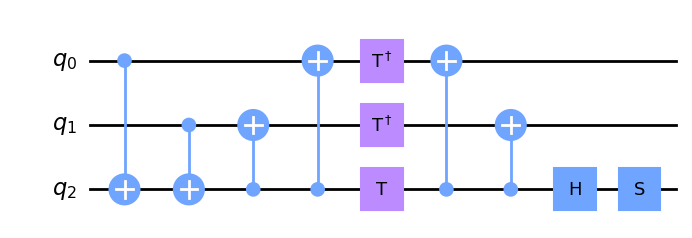

In [10]:
#@title Temporary logical-AND gate

# Creating a circuit where the AND gate will be designed
qc = QuantumCircuit(3)

# Adding CNOTs
qc.cx(0,2)
qc.cx(1,2)
qc.cx(2,1)
qc.cx(2,0)

# T and T-dagger gates
qc.tdg(0)
qc.tdg(1)
qc.t(2)

# Inverse operation of the last 2 CNOTs
qc.cx(2,0)
qc.cx(2,1)

# Hadamard and phase on the qubit with the result
qc.h(2)
qc.s(2)

# Saving as a gate variable and naming it "AND"
temp_log_and = qc.to_gate()
temp_log_and.name = "AND"

# Displaying the AND circuit
qc.draw(output='mpl', style="clifford")

## **STEP 2:**

Here we going to create the comparator.

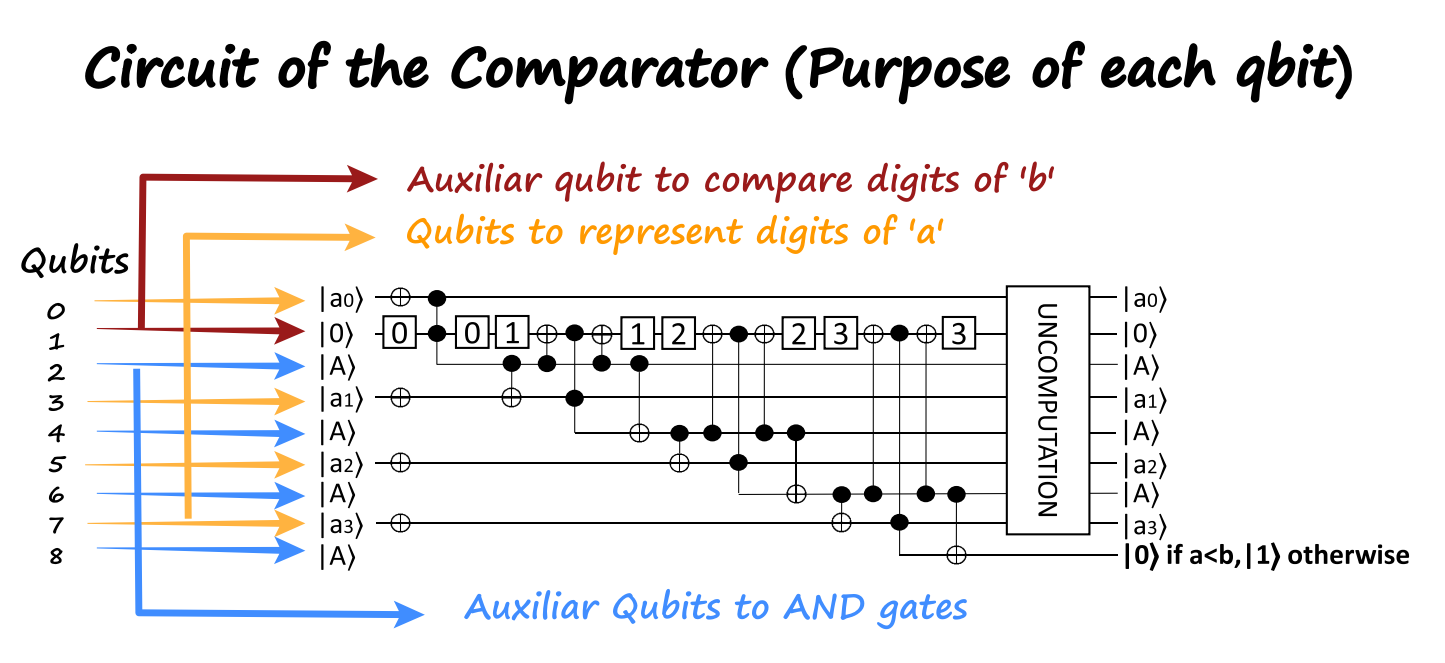

The previous image shows the design of the *Comparator*, the number of qubits, the purpose of each qubit, the gates that will be used and in which qubit the result will come out.

### **STEP 2.1**

First of all, we are going to define the variables that we are going to use throughout the code.

In [11]:
# Binary numbers in the domain [a, b)
a_init = '000'   # 0
b_init = '011'   # 3

# Number of qubits to represent a and b. They must have the same length.
nqubits = len(b_init)

# Order to be read in the circuit
b = b_init[::-1]
a = a_init[::-1]

# Creating the quantum circuit where the Comparator will be placed
qc = QuantumCircuit(2*nqubits + 1)

# Defining the state (1/√2) (|0> + e^(iπ/4)|1>)
state = [1/np.sqrt(2), (1 + 1j)/2]

# Positions of qubits 'a' and 'A'
qbits_ai_position = [2*i + 1 if i != 0 else i for i in range(nqubits)]
qbits_Ai_position = [2*i + 2 for i in range(nqubits)]

### **STEP 2.2**

Now we begin to add gates, for the implementation we divide into the initialization of the qbits and the comparison of the first digit of the binary number 'b' with that of the first of 'a'.

In [12]:
# Initializing each qubit in 'a' to the value 1
for i in qbits_ai_position:
    qc.x(i)

# Implementing the Comparator

# If the first digit of binary number 'b' is '1', apply a Pauli-X gate to qubit 1; otherwise, apply an identity gate
if b[0] == '1':
    qc.x(1)
else:
    qc.id(1)  # Use 'i' for the identity gate

# Compare qubits 0 (first qubit 'a') and 1 (auxiliary qubit |0>) with an AND gate and send the result to qubit 2 (first auxiliary qubit of 'A')
qc.append(temp_log_and, [0, 1, 2])

# Perform the inverse operation on qubit 1
if b[0] == '1':
    qc.x(1)
else:
    qc.id(1)  # Use 'i' for the identity gate

# For aesthetic reasons, add an identity gate to qubit 2
qc.id(2)


### **STEP 2.3**

After comparing the first digit, in the following digits the formula is repeated with the following instructions in a loop.

In [13]:
# Perform a loop from 1 to N-1 to compare each digit of binary 'a' with 'b'
for j in range(1, nqubits):

    # Compare the next digit of 'b'
    if b[j] == '1':
        qc.x(1)
    else:
        qc.id(1)  # Use 'i' for the identity gate

    # Perform a CNOT gate that takes the result stored in the corresponding auxiliary qubit of 'A'
    # and passes the result from the gate to the next qubit in 'a'
    qc.cx(2*j, 2*j+1)

    # Take the result from 'A' to input into the AND gate at qubit 1
    qc.cx(2*j, 1)

    # Apply an AND gate to compare the temporary value of qubit 1 with each qubit in 'a' and store the result in the auxiliaries 'A'
    qc.append(temp_log_and, [1, 2*j+1, 2*j+2])

    # Perform the inverse CNOT operation to the previous one
    qc.cx(2*j, 1)

    # Perform the inverse operation to the compared digit of 'b'
    if b[j] == '1':
        qc.x(1)
    else:
        qc.id(1)  # Use 'i' for the identity gate

    # Pass the result to the next qubit in 'a'
    qc.cx(2*j, 2*j+2)


### **STEP 2.4**

Finally, we save the created circuit in a qiskit gate variable. With this we will have a more organized final circuit and the calculation of the uncomputation will be more direct.

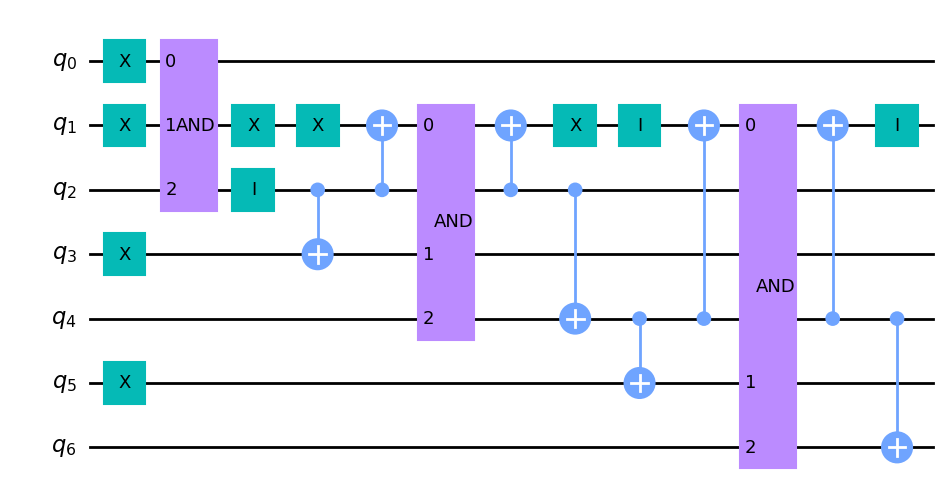

In [14]:
# Convert the designed comparator to a gate named "Comparator"
COMPARATOR = qc.to_gate()
COMPARATOR.name = "Comparator"

# Display the resulting circuit with the Comparator gate
qc.draw(output='mpl', style="clifford")


## **STEP 3:**

In the next step, we will create the generator by initializing the qubits, adding the oracle (which consists of the comparator, a CNOT gate to obtain the result and the uncomputer), the amplifier and the measurements.

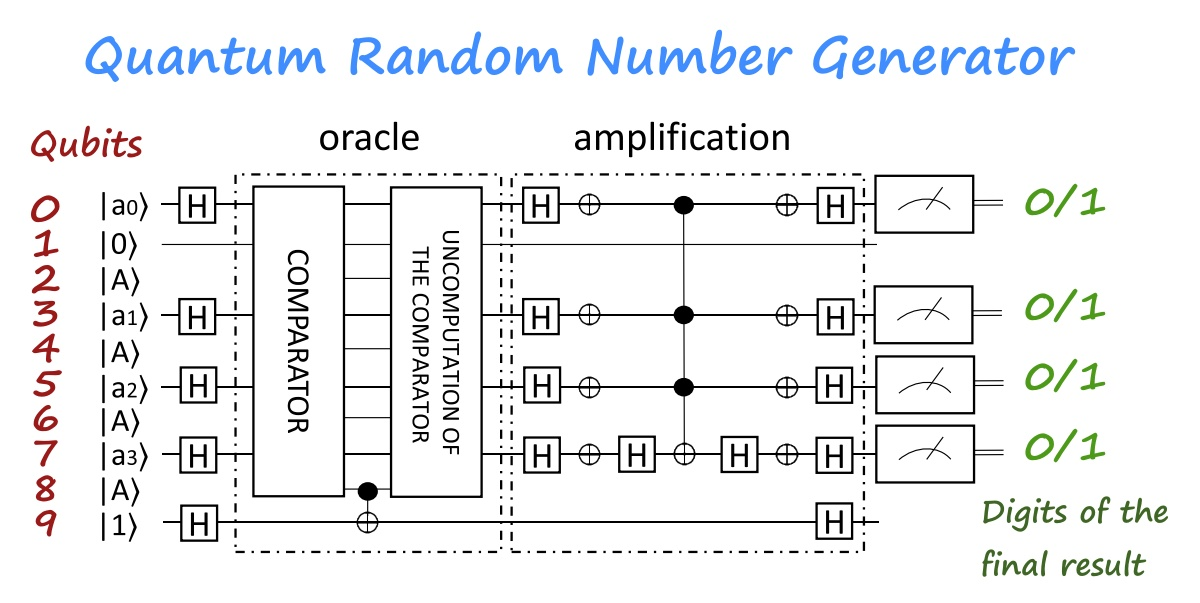

### **STEP 3.1**
We create the circuit where the generator will be, we initialize the qubits, the digits of 'a' with zeros, the auxiliary qubits for the AND gate 'A' will be initialized with

$(\frac{1}{\sqrt{2}}) (|0> + e^{(iπ/4)}|1>)$

Finally we calculate how many time we repeat the oracle with the following equation

$ N = (\pi/4) * \sqrt{\frac{2^{nqubits}}{l}}$

where $l = b - a$


In [15]:
# Creating the quantum circuit with 2n + 2 qubits and n classical bits
qc = QuantumCircuit(2*nqubits + 2, nqubits)

# Initializing the last qubit as 1
qc.x(2*nqubits + 1)
qc.barrier()

# Initializing qubits 'a' and 'A'
for i, j in zip(qbits_ai_position, qbits_Ai_position):
    qc.h(i)                         # Put qubits 'a' into superposition
    qc.initialize(state, j)         # Initialize qubits 'A' with the state (0.707, 0.5+0.5j)
qc.barrier()

# Calculating the length of the range specified by the user
l = int(b_init, 2) - int(a_init, 2)

# Number of times the oracle and amplifier will need to be used
N = int((np.pi/4) * np.sqrt(2**nqubits/l))


### **STEP 3.2**

Now we proceed to put the oracle with the gate variable that we defined before. The amplifier must also be repeated N times, so it will be next to the oracle in the same loop.


In [16]:
# Adding the Oracle and Amplifier circuits (repeated N times)
for t in range(N):

    # Adding the ORACLE to the circuit
    qc.append(COMPARATOR, range(0, 2*nqubits+1))

    # Obtaining the result (0 if a < b, 1 otherwise)
    qc.cx(2*nqubits, 2*nqubits+1)

    # Performing the inverse operations
    qc.append(COMPARATOR.inverse(), range(0, 2*nqubits+1))

    # Barrier
    qc.barrier()

    # Adding the AMPLIFIER to the circuit
    for i in qbits_ai_position:
        qc.h(i)     # Hadamard gate
        qc.x(i)     # Pauli-X gate

    # Adding Hadamard gates on the last 'a' qubit on the sides of a Toffoli gate acting on 'a' qubits
    qc.h(qbits_ai_position[-1])
    qc.mcx(qbits_ai_position[:-1], qbits_ai_position[-1])
    qc.h(qbits_ai_position[-1])

    # Barrier
    qc.barrier()

    # Completing the amplifier with inverse operations
    for i in qbits_ai_position:
        qc.x(i)     # Pauli-X gate
        qc.h(i)     # Hadamard gate

    # Hadamard gate on the last qubit for the inverse operation
    qc.h(2*nqubits + 1)
    qc.barrier()

### **STEP 3.3**

Finally, we create the measurements in the qubits 'a'


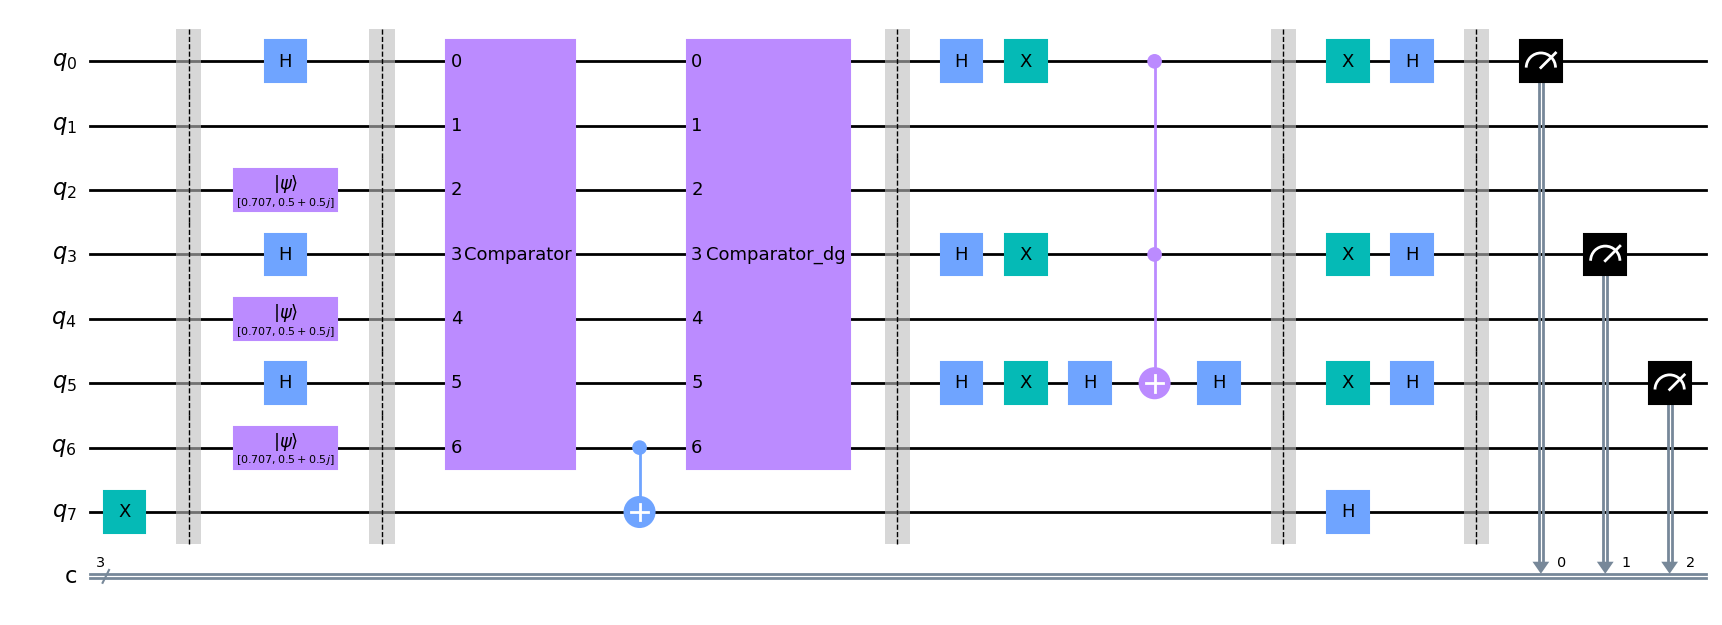

In [17]:
# Performing measurements on the resulting qubits (bits of the generated random number)
for j, k in enumerate([2*i + 1 if i != 0 else i for i in range(nqubits)]):
    qc.measure(k, j)

# Display the circuit
qc.draw(output='mpl', style="clifford")


## **TEST RUN**

In this point, we're going to test our circuit. We will simulate with Qiskit and we will display a histogram with the numbers obtained.

In [20]:
# Choose the backend for simulation
backend = Aer.get_backend('qasm_simulator')

# Create a job to execute the quantum circuit 'qc' on the chosen backend and specify the number of shots (repetitions)
job = execute(qc, backend, shots=500)

# Retrieve the result of the job
result = job.result()

# Extract the measurement counts
count = result.get_counts()

print(count)

{'110': 39, '001': 101, '010': 93, '000': 119, '101': 41, '011': 32, '111': 42, '100': 33}


The counts are on the side of the respective binary value, so in the following graph we will show the numbers in decimal and their respective counts.

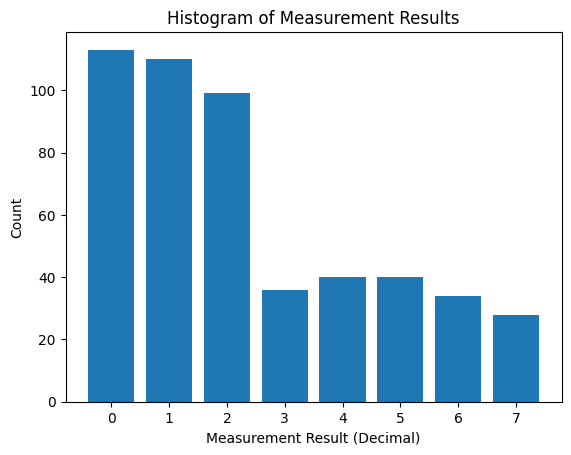

In [19]:
# Sort the counts and decimal labels together based on decimal labels
sorted_counts = dict(sorted(count.items(), key=lambda x: int(x[0], 2)))

# Convert binary keys to decimal for labeling
decimal_labels = [int(key, 2) for key in sorted_counts.keys()]

# Create the histogram
plt.bar(decimal_labels, sorted_counts.values(), )

# Add labels and title to the plot
plt.xlabel('Measurement Result (Decimal)')
plt.ylabel('Count')
plt.title('Histogram of Measurement Results')

# Display the histogram
plt.show()

### **CONCLUSION**

As expected, **the most probable numbers are within the range** that we defined at the beginning of creating the circuit.

It is important to remember that each range of numbers in principle has a different circuit construction. **Our implementation helps** in the sense **that you only define the 2 numbers** of the range **and when you execute you will have the circuit for that pair**.

Another important clarification is that **in some ranges it can give very dispersed results**, so it must be taken into account to better change the domain to another but similar one.

# **Glossary**

**Quantum computing:** Quantum computing is a paradigm of computing that uses quantum bits or qubits, which can exist in superposition states of 0 and 1 simultaneously. It leverages quantum phenomena such as entanglement and interference to perform certain types of calculations exponentially faster than classical computers.

**Superposition:** Superposition is a fundamental concept in quantum mechanics where a quantum system can exist in multiple states or values simultaneously. In the context of qubits, it means they can represent both 0 and 1 at the same time until measured.

**Uncertainty:** Uncertainty, in the context of quantum mechanics, is a principle described by Heisenberg's Uncertainty Principle. It states that certain pairs of physical properties, like the position and momentum of a particle, cannot be precisely measured simultaneously. There is inherent uncertainty in knowing both properties accurately.

**PRNG (Pseudo-Random Number Generator):**
A Pseudo-Random Number Generator (PRNG) is an algorithm or function that generates sequences of numbers that appear to be random but are actually generated by deterministic processes. PRNGs are commonly used in classical computing for various applications, such as simulations and cryptography.



# **Authors**

*   Miguel Angel Hernandez Tapia [Github](https://github.com/MiguelAngel-ht)
*   David Ángel Alba Bonilla [Github](https://github.com/DavidAlba2627) -- [Blog](https://datasciencelifelonglearn.blogspot.com/)



# **Bibliography**

1. Orts, F., Filatovas, E., Garzón, E. G., & Ortega, G. (2023). A quantum circuit to generate random numbers within a specific interval. EPJ Quantum Technology, 10(1). https://doi.org/10.1140/epjqt/s40507-023-00174-1